In [1]:
import dicomsdl as dicom

`dicom.open` reads a DICOM formatted file and returns a DataSet object, which holds all information.

In [2]:
ds = dicom.open("CT2_JLSN")  # file is available at ftp://medical.nema.org/MEDICAL/Dicom/DataSets/WG04

`dataset.pixelData()` returns a numpy array contains pixel values, which is the most of you are interested in. You need to install `numpy` for this (if you don't have it yet...)

In [3]:
ds.pixelData()

array([[-2050., -2050., -2050., ..., -2045., -2045., -2045.],
       [-2050., -2050., -2050., ..., -2049., -2049., -2049.],
       [-2050., -2050., -2050., ..., -2047., -2047., -2047.],
       ...,
       [-2044., -2044., -2044., ..., -2048., -2048., -2048.],
       [-2044., -2044., -2044., ..., -2048., -2048., -2048.],
       [-2044., -2044., -2044., ..., -2046., -2046., -2046.]],
      dtype=float32)

`dataset.toPilImage()` returns a `pillow` image object. You may display the image or save it in jpeg or png or whatever `pillow` supporting formats. You need to install `pillow`.

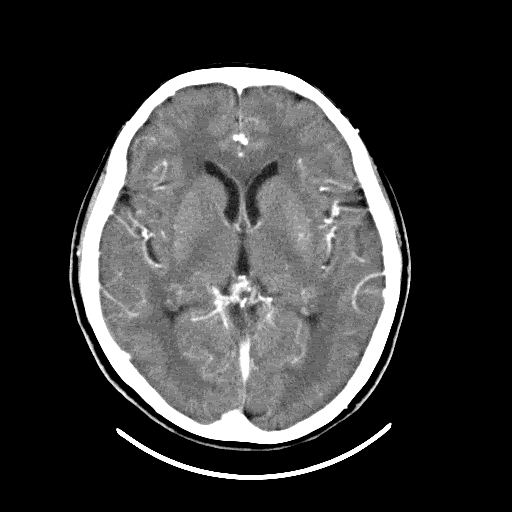

In [4]:
ds.toPilImage()

`dataset.getPixelDataInfo()` will return values related pixel data. 

In [5]:
ds.getPixelDataInfo()

{'Rows': 512,
 'Cols': 512,
 'NumberOfFrames': 1,
 'SamplesPerPixel': 1,
 'PlanarConfiguration': None,
 'BitsAllocated': 16,
 'BytesAllocated': 2,
 'BitsStored': 16,
 'PixelRepresentation': True,
 'dtype': 'h',
 'PhotometricInterpretation': 'MONOCHROME2',
 'WindowCenter': 35.0,
 'WindowWidth': 80.0,
 'RescaleIntercept': 0.0,
 'RescaleSlope': 1.0}

`ds.dump()` returns a dump string of the `dataset`. Each line represents a `DataElement` which has tag and value. To access the value of a `DataElement`, you need tag or keyword. You can find tag or keyword from this dump string.

In [6]:
print(ds.dump()[:2000]+' ...')

TAG	VR	LEN	VM	OFFSET	KEYWORD
'00020000'	UL	4	1	0x8c	192	# FileMetaInformationGroupLength
'00020001'	OB	2	1	0x9c	'\x00\x01'	# FileMetaInformationVersion
'00020002'	UI	26	1	0xa6	'1.2.840.10008.5.1.4.1.1.2' = CT Image Storage	# MediaStorageSOPClassUID
'00020003'	UI	46	1	0xc8	'1.3.6.1.4.1.5962.1.1.2.1.7.20040826185059.5457'	# MediaStorageSOPInstanceUID
'00020010'	UI	22	1	0xfe	'1.2.840.10008.1.2.4.81' = JPEG-LS Lossy (Near-Lossless) Image Compression	# TransferSyntaxUID
'00020012'	UI	18	1	0x11c	'1.3.6.1.4.1.5962.2'	# ImplementationClassUID
'00020013'	SH	10	1	0x136	'DCTOOL100'	# ImplementationVersionName
'00020016'	AE	8	1	0x148	'CLUNIE1'	# SourceApplicationEntityTitle
'00080008'	CS	24	3	0x158	'DERIVED\SECONDARY\AXIAL'	# ImageType
'00080012'	DA	8	1	0x178	'20040826'	# InstanceCreationDate
'00080013'	TM	6	1	0x188	'185120'	# InstanceCreationTime
'00080014'	UI	18	1	0x196	'1.3.6.1.4.1.5962.3'	# InstanceCreatorUID
'00080016'	UI	26	1	0x1b0	'1.2.840.10008.5.1.4.1.1.2' = CT Image Storage	# SOPClassUID

From above string, you can find `StudyDate`. A `DataElement` with tag (0008,0020) holds a value for `StudyDate`. You can get same value in several ways. You may choose whatever you fill easy.

In [7]:
print(ds.StudyDate)
print(ds['(0008,0020)'])
print(ds[0x00080020])
print(ds['00080020'])
print(ds.getDataElement(0x00080020).toString())
print(ds.getDataElement(0x00080020).value())

20040826
20040826
20040826
20040826
20040826
20040826


If a `DataElement` with a given tag does not exist, above line will return `None`

In [8]:
print(ds.InstitutionAddress)

None


You can retrieve multiple `DataElement`s values in one line.

In [9]:
ds.getValues(['StudyDate', 'StudyTime', 'InstitutionName', 'InstitutionAddress'])

['20040826', '185059', 'TOSHIBA', None]